<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Decision_tress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from mlxtend import __version__ as ver

In [10]:
# version of mlxtend

ver

'0.22.0'

## Decision Tree Classifier

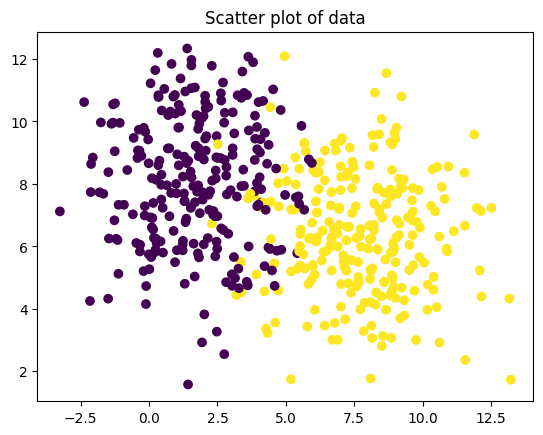

In [4]:
# generate the data

X, y = make_blobs(n_samples=500,n_features=2,
                  centers=2,random_state=20,
                  cluster_std=2)

# plot the data on scatter plot
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Scatter plot of data')
plt.show()

In [13]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# function to plot and visualize the decision tree and decision regions

def plot_clf(dt):
    # plot the decision tree

    fig1 = plt.figure(figsize=(15,12))
    plot_tree(decision_tree=dt,filled=True)
    plt.show()

    # plot the decision boundaries

    fig2 = plt.figure(figsize=(12,8))
    plot_decision_regions(X=X_train,y=y_train,clf=dt)
    plt.show()

In [20]:
# train the decision tree classifier to maximum depth

dt1 = DecisionTreeClassifier()

# train on training data
dt1.fit(X_train,y_train)

# predict on the training data
y_pred_train = dt1.predict(X_train)

# predict on the test data
y_pred_test = dt1.predict(X_test)

# calculate the accuracy score for the train and test data
train_score  = accuracy_score(y_train,y_pred_train)
test_score = accuracy_score(y_test,y_pred_test)

# print the score
print('The train score is ',np.round(train_score,2))
print('The test score is ',np.round(test_score,2))


The train score is  1.0
The test score is  0.93


**The training accuracy of 100% and test accuracy of 93% clearly indicates that the fully grown decision tree in classification scenario overfits.**

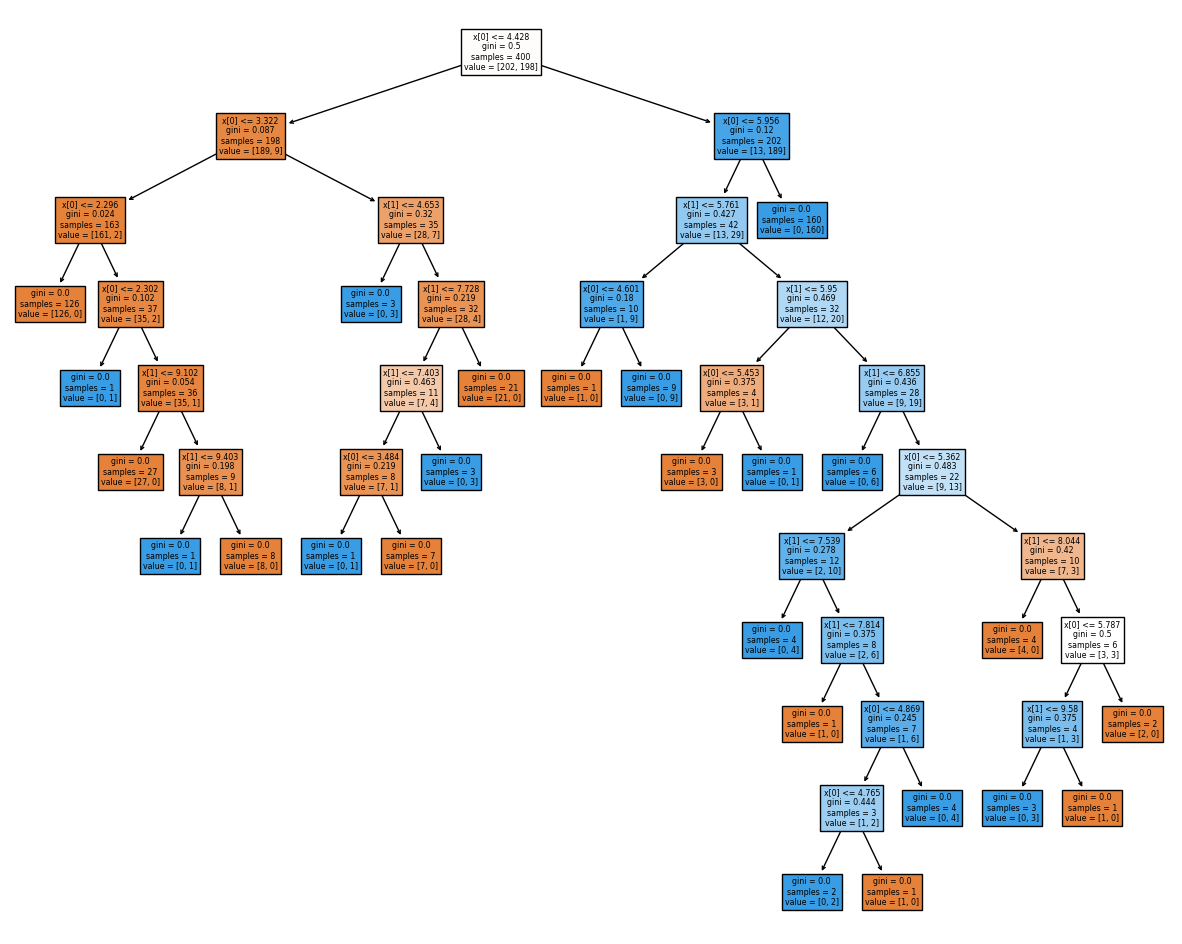

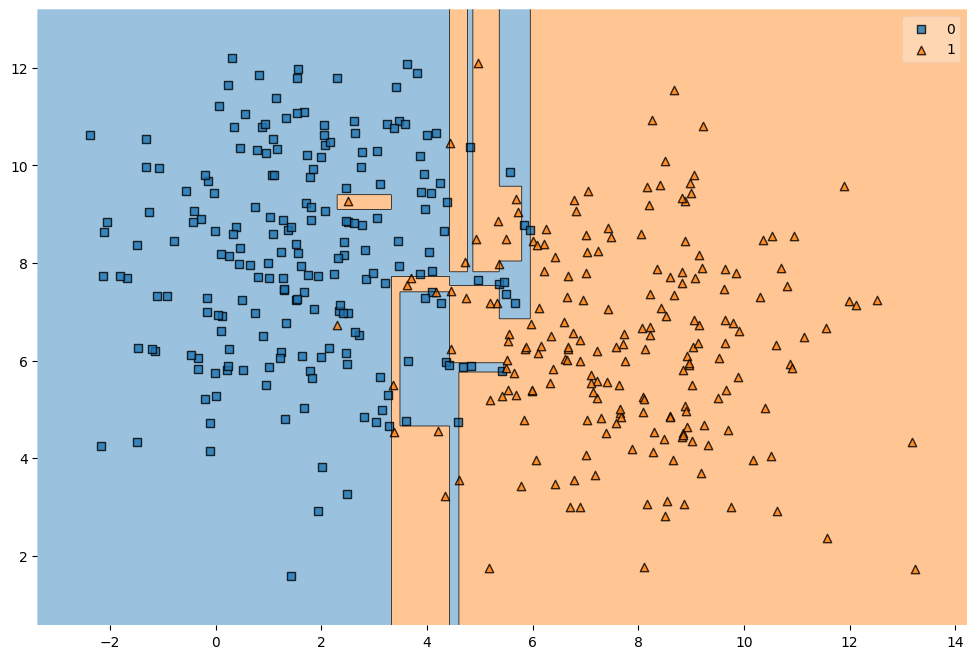

In [21]:
# plot the decision tree and decision boundary

plot_clf(dt=dt1)

In [22]:
# train the decision tree classifier to maximum depth of 3
# prune the decision tree

dt2 = DecisionTreeClassifier(max_depth=3)

# train on training data
dt2.fit(X_train,y_train)

# predict on the training data
y_pred_train = dt2.predict(X_train)

# predict on the test data
y_pred_test = dt2.predict(X_test)

# calculate the accuracy score for the train and test data
train_score  = accuracy_score(y_train,y_pred_train)
test_score = accuracy_score(y_test,y_pred_test)

# print the score
print('The train score is ',np.round(train_score,2))
print('The test score is ',np.round(test_score,2))

The train score is  0.95
The test score is  0.93


In [30]:
# cross validate the results

from sklearn.model_selection import KFold,cross_val_score

scores = cross_val_score(dt2,X_train,y_train,
                         scoring='accuracy',
                         cv=KFold(n_splits=5,shuffle=True,random_state=42))

print('The average score is',scores.mean())

The average score is 0.925


**A pruned Decision Tree does not show any signs of overfitting**

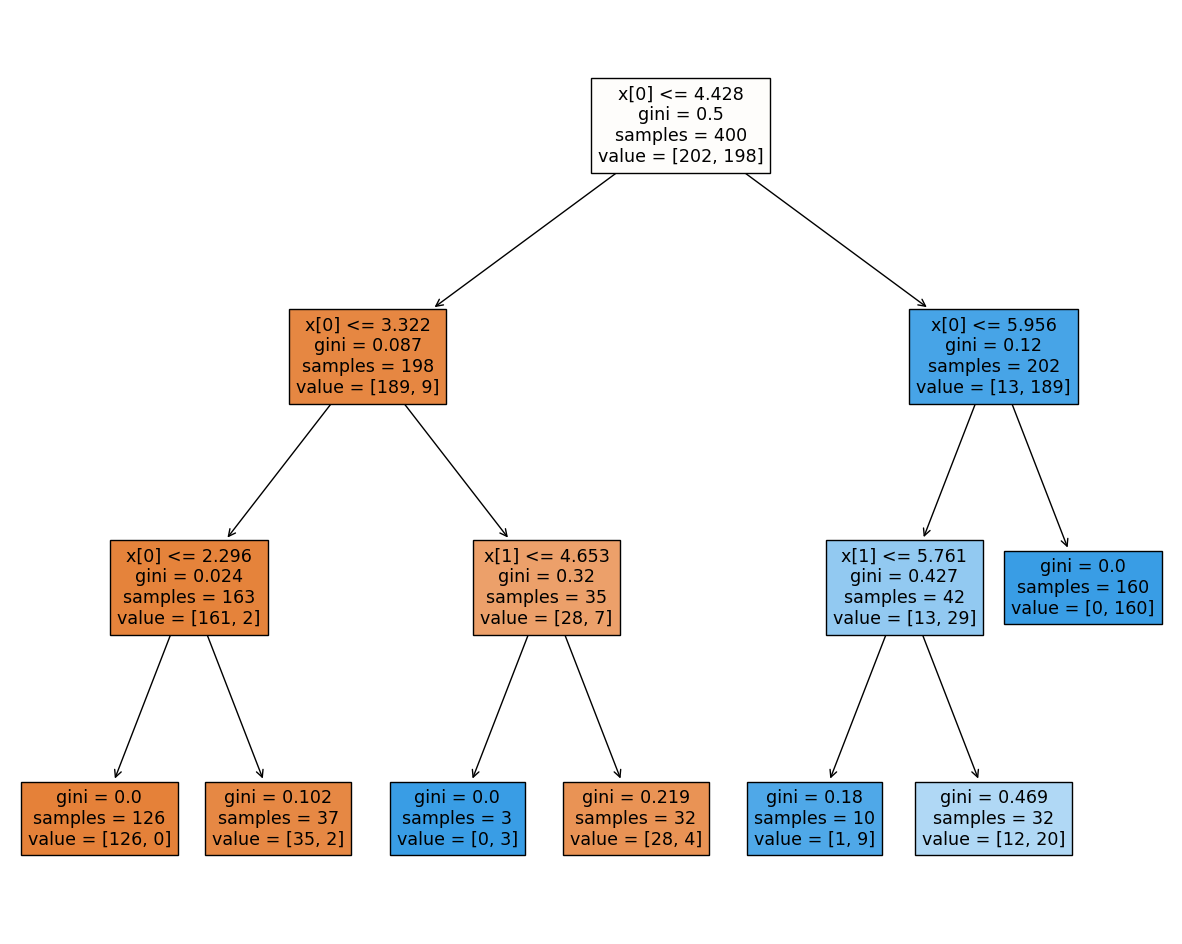

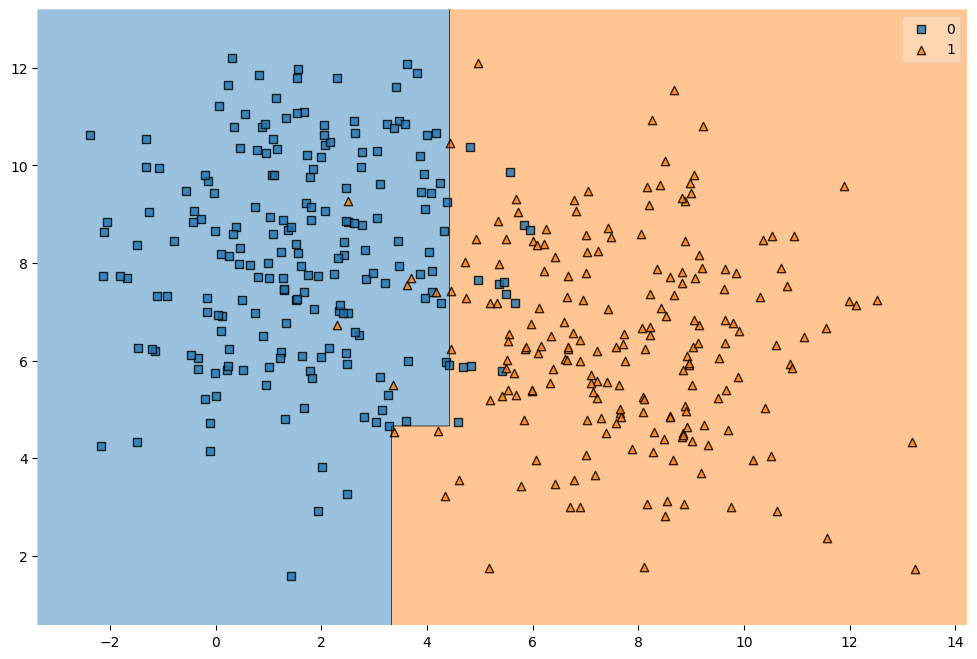

In [31]:
# plot the decision tree and decision boundary

plot_clf(dt=dt2)

## Decision Trees regressor

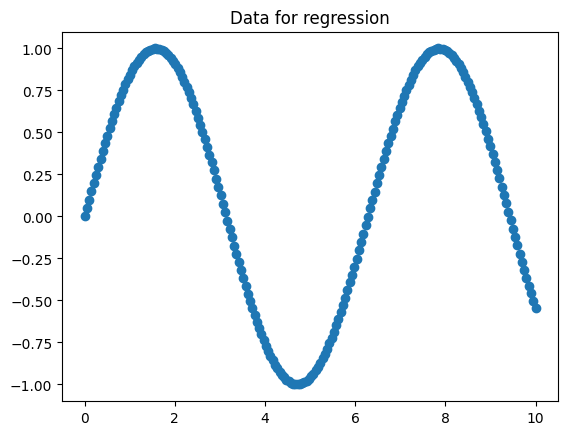

In [65]:
# generate the sin data

X = np.linspace(0,10,200).reshape(-1,1)
y = np.sin(X)

# plot the data
plt.scatter(X,y)
plt.title('Data for regression')
plt.show()

In [74]:
# function to plot and visualize the decision tree and decision regions

def plot_reg(dt):
    # plot the decision tree

    fig1 = plt.figure(figsize=(15,12))
    plot_tree(decision_tree=dt,filled=True)
    plt.show()

    # plot the decision boundaries
    fig2 = plt.figure(figsize=(12,7))
    X_temp = np.linspace(0,10,200)
    y_pred_temp = dt.predict(X_temp.reshape(-1,1))

    # plot the scatter plot
    plt.scatter(X_train,y_train)

    # plot the regression line
    plt.plot(X_temp,y_pred_temp,color='red',label='Regression Curve')
    plt.legend()
    plt.show()

In [75]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.metrics import r2_score

In [77]:
# train the decision tree ReDecisionTreeRegressor to maximum depth

dt1 = DecisionTreeRegressor()

# train on training data
dt1.fit(X_train,y_train)

# predict on the training data
y_pred_train = dt1.predict(X_train)

# predict on the test data
y_pred_test = dt1.predict(X_test)

# calculate the accuracy score for the train and test data
train_score  = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

# print the score
print('The train score is ',np.round(train_score,2))
print('The test score is ',np.round(test_score,2))


The train score is  1.0
The test score is  0.99


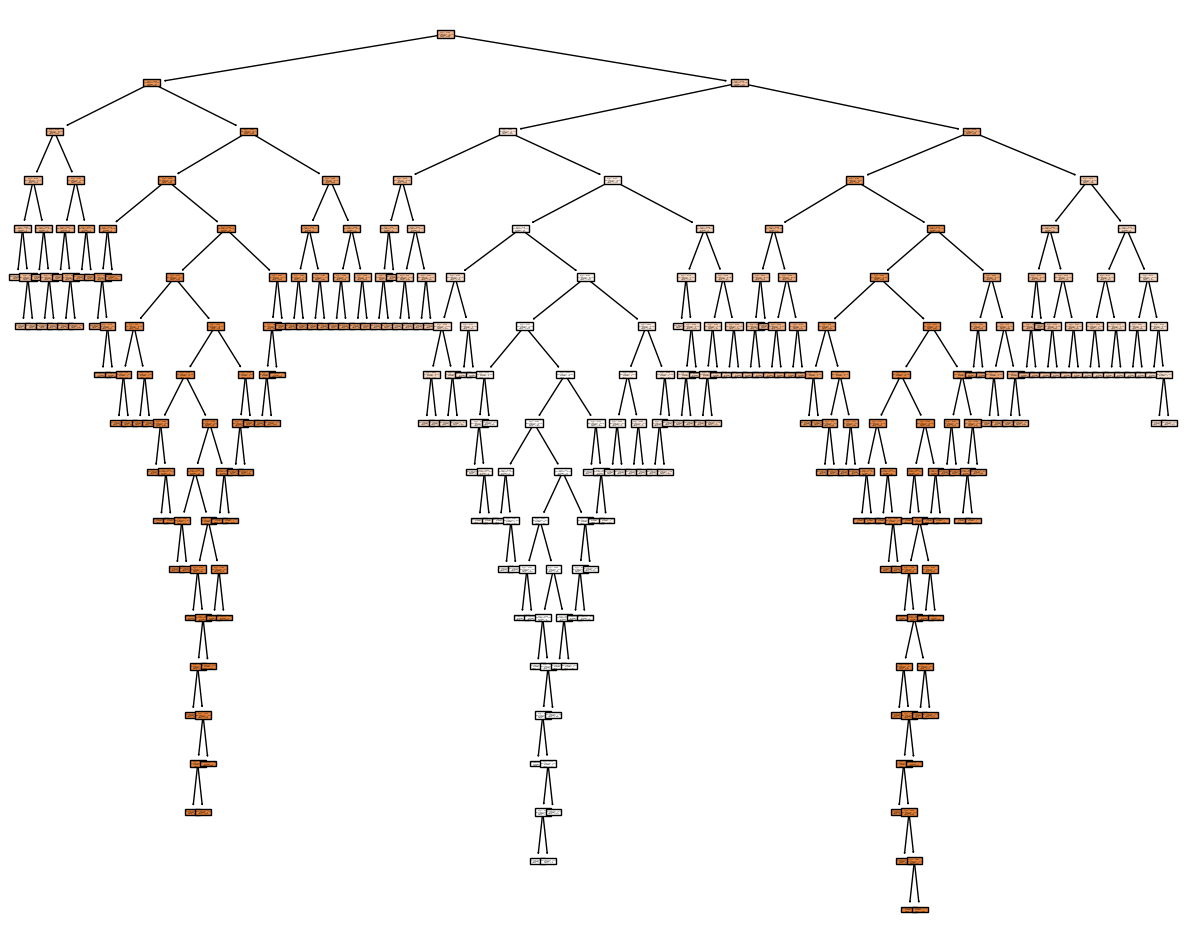

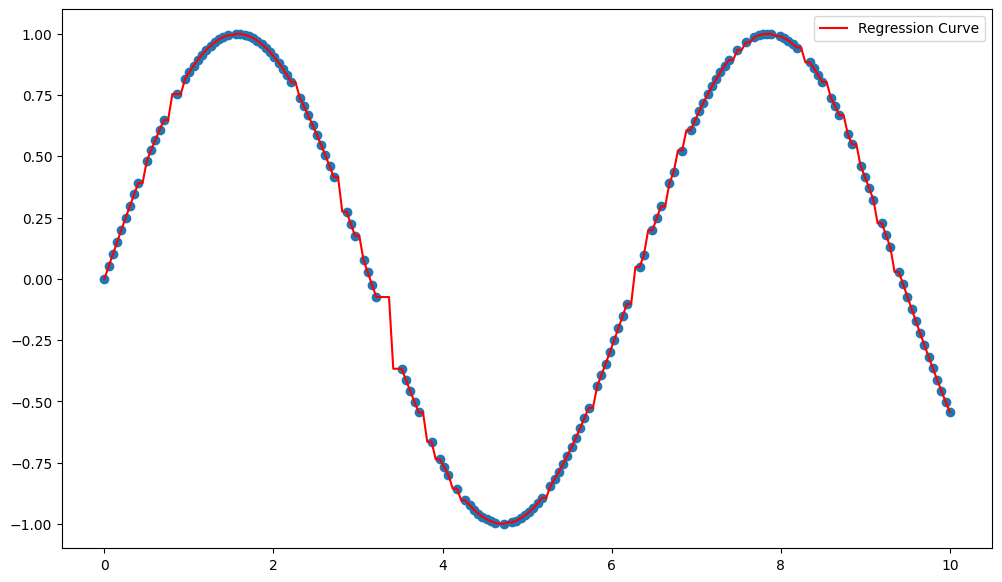

In [78]:
# plot the decision tree and regression plot

plot_reg(dt=dt1)

In [79]:
# train the decision tree ReDecisionTreeRegressor to maximum depth of 4

dt2 = DecisionTreeRegressor(max_depth=4)

# train on training data
dt2.fit(X_train,y_train)

# predict on the training data
y_pred_train = dt2.predict(X_train)

# predict on the test data
y_pred_test = dt2.predict(X_test)

# calculate the accuracy score for the train and test data
train_score  = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

# print the score
print('The train score is ',np.round(train_score,2))
print('The test score is ',np.round(test_score,2))


The train score is  0.95
The test score is  0.91


In [80]:
# cross validate the results

from sklearn.model_selection import KFold,cross_val_score

scores = cross_val_score(dt2,X_train,y_train,
                         scoring='r2',
                         cv=KFold(n_splits=5,shuffle=True,random_state=42))

print('The average score is',scores.mean())

The average score is 0.9444261003469652


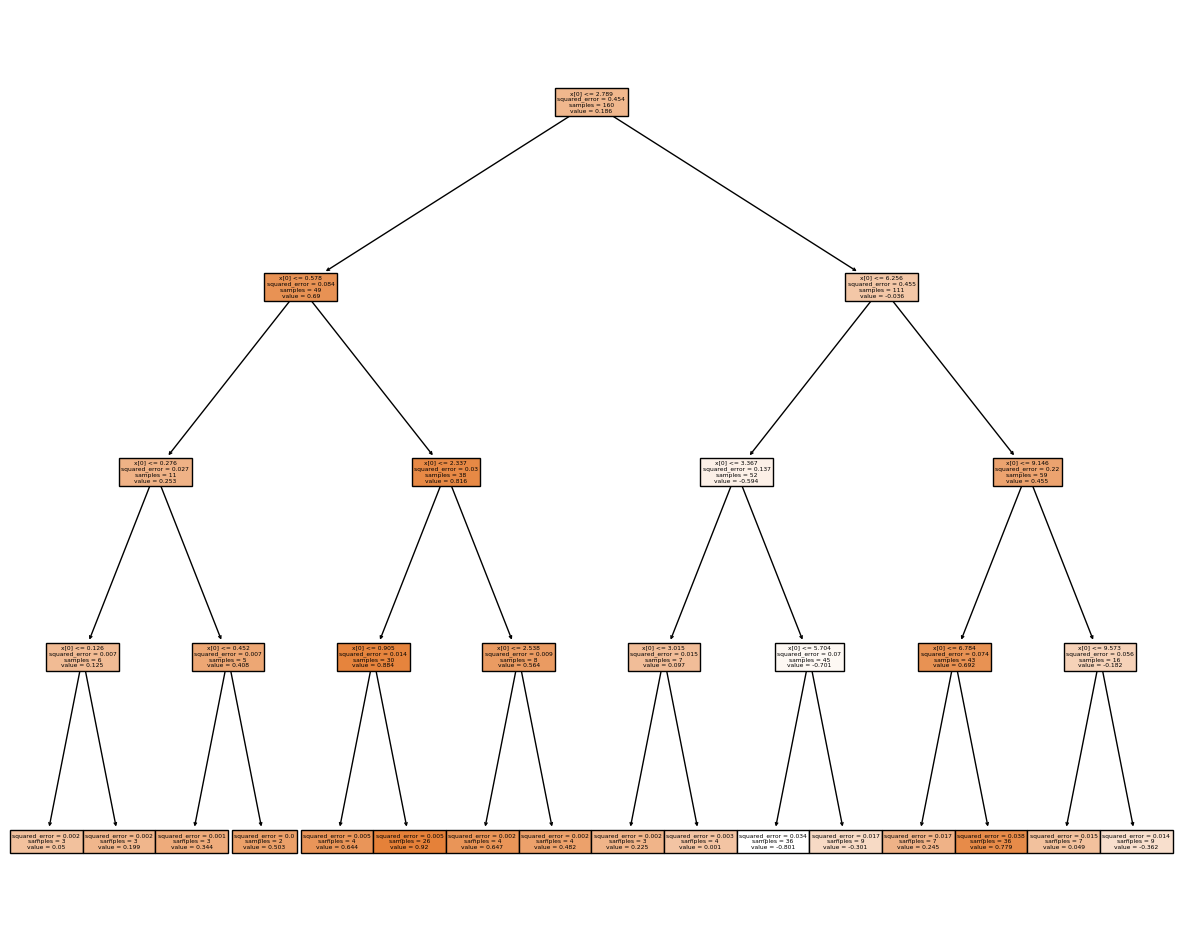

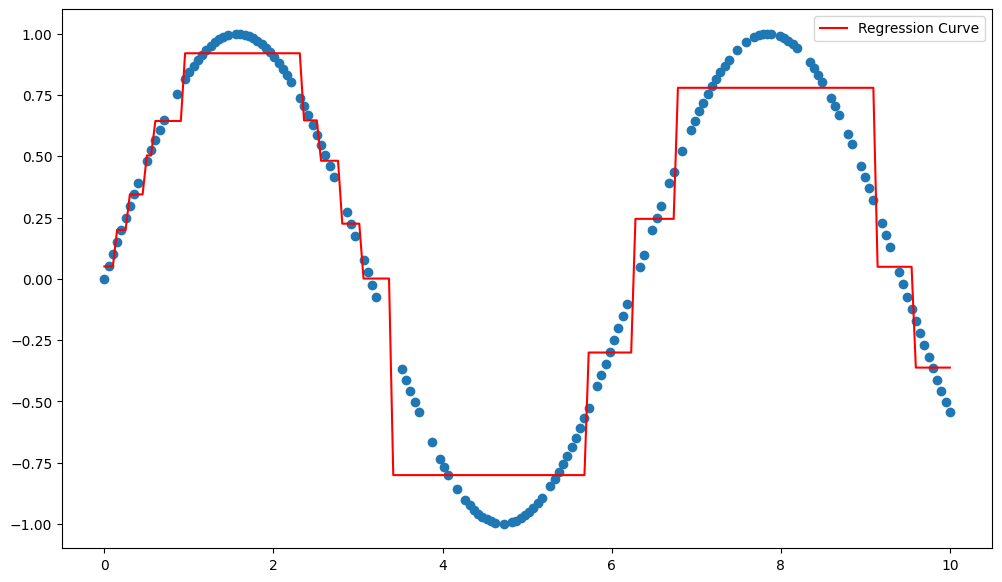

In [81]:
# plot the decision tree and regression plot

plot_reg(dt=dt2)